# Análisis Exploratorio de Datos y Creación del Dataset Completo

In [40]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [41]:
path = "./dataset/"
df_fake = pd.read_csv(path + "Fake.csv")
df_true = pd.read_csv(path + "True.csv")

In [42]:
df_fake["label"] = 0
df_true["label"] = 1

In [43]:
df = pd.concat([df_fake, df_true], ignore_index=True)

In [44]:
df.shape

(44898, 5)

In [45]:
df.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   label    44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.7+ MB


In [47]:
# no hay nulos
df.isnull().sum()

title      0
text       0
subject    0
date       0
label      0
dtype: int64

In [48]:
# duplicados
df.duplicated().sum()

209

In [49]:
df.drop_duplicates(inplace=True)

In [50]:
# duplicados
df.duplicated().sum()

0

In [51]:
categoricas = df.select_dtypes(include="object")

In [52]:
categoricas.describe()

,title,text,subject,date
count,44689,44689,44689,44689
unique,38729,38646,8,2397
top,Factbox: Trump fills top jobs for his administ...,,politicsNews,"December 6, 2017"
freq,14,627,11220,166


subject
politicsNews       11220
worldnews           9991
News                9050
politics            6838
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: count, dtype: int64


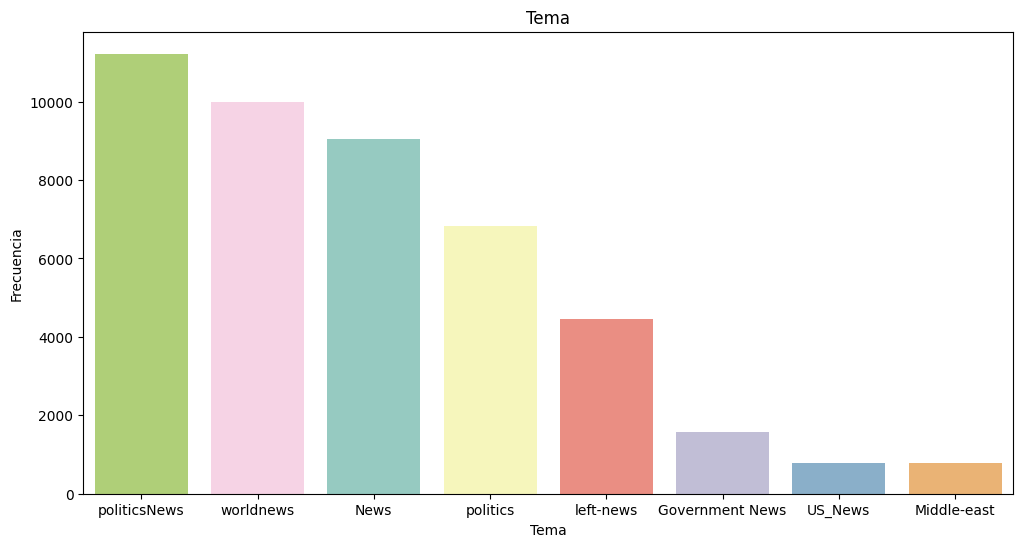

In [53]:
plt.figure(figsize=(12, 6))
sns.countplot(x="subject", data=df, palette="Set3", order=df["subject"].value_counts().index, hue="subject")
print(df["subject"].value_counts())
plt.title("Tema")
plt.xlabel("Tema")
plt.ylabel("Frecuencia")
plt.show()

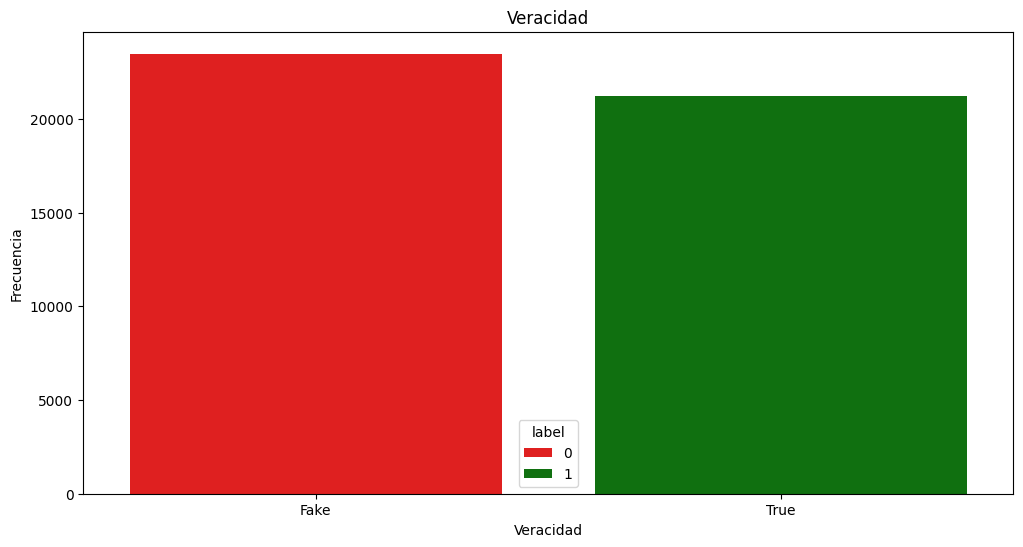

In [54]:
# fake 0, true 1
colores_mapa = {0: "red", 1: "green"}
tipo_mapa = {0: "Fake", 1: "True"}
plt.figure(figsize=(12, 6))
sns.countplot(x="label", data=df, palette=colores_mapa, order=df["label"].value_counts().index, hue="label")
plt.xticks([0, 1], [tipo_mapa[0], tipo_mapa[1]])
plt.title("Veracidad")
plt.xlabel("Veracidad")
plt.ylabel("Frecuencia")
plt.show()

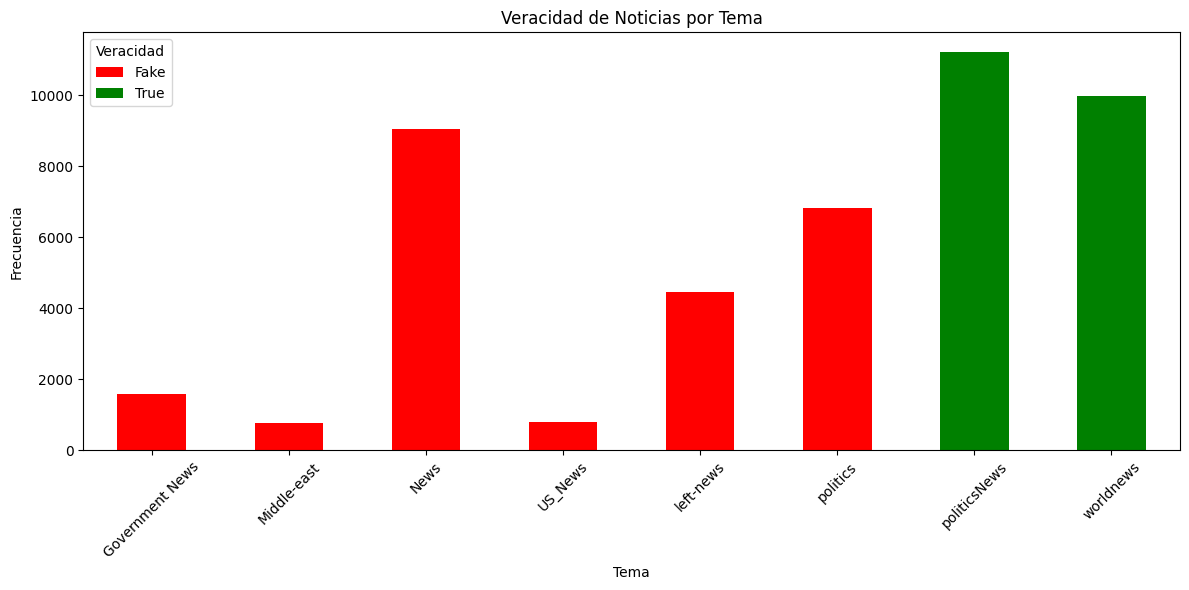

In [55]:
# Agrupar los datos por "subject" y "label"
grouped_data = df.groupby(["subject", "label"]).size().unstack(fill_value=0)

grouped_data.plot(kind="bar", stacked=True, figsize=(12, 6), color=["red", "green"])

plt.title("Veracidad de Noticias por Tema")
plt.xlabel("Tema")
plt.ylabel("Frecuencia")
plt.xticks(rotation=45)  
plt.legend(title="Veracidad", labels=["Fake", "True"])
plt.tight_layout()  
plt.show()

In [30]:
for subject in df["subject"].unique():
    print(subject)
    print(df[df["subject"] == subject]["label"].value_counts())

News
label
0    9050
Name: count, dtype: int64
politics
label
0    6838
Name: count, dtype: int64
Government News
label
0    1570
Name: count, dtype: int64
left-news
label
0    4459
Name: count, dtype: int64
US_News
label
0    783
Name: count, dtype: int64
Middle-east
label
0    778
Name: count, dtype: int64
politicsNews
label
1    11220
Name: count, dtype: int64
worldnews
label
1    9991
Name: count, dtype: int64


# Fechas nulas

In [32]:
df['date'] = pd.to_datetime(df['date'], format='mixed', errors='coerce')

In [33]:
# Fechas nulas
df['date'].isnull().sum()

10

In [34]:
# borra fechas nulas
df = df.dropna(subset=['date'])

In [35]:
df = pd.get_dummies(df, columns=['subject'])

In [36]:
df

,title,text,date,label,subject_Government News,subject_Middle-east,subject_News,subject_US_News,subject_left-news,subject_politics,subject_politicsNews,subject_worldnews
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,2017-12-31,0,False,False,True,False,False,False,False,False
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,2017-12-31,0,False,False,True,False,False,False,False,False
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",2017-12-30,0,False,False,True,False,False,False,False,False
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",2017-12-29,0,False,False,True,False,False,False,False,False
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,2017-12-25,0,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
44893,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,2017-08-22,1,False,False,False,False,False,False,False,True
44894,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",2017-08-22,1,False,False,False,False,False,False,False,True
44895,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,2017-08-22,1,False,False,False,False,False,False,False,True
44896,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,2017-08-22,1,False,False,False,False,False,False,False,True


In [37]:
path = "./dataset/"
df.to_csv(path + "df_completo.csv", index=False)